# Assignment 5 · Revisiting HHL for a 4×4 Linear System
This notebook is a code-completion exercise. Work through the TODO placeholders to rebuild the Harrow–Hassidim–Lloyd (HHL) workflow, compare it with a classical baseline, and analyse the tomography surrogate.

This refreshed notebook mirrors the structured workflow from Assignment 3 so every phase stays auditable and reproducible.

**How to proceed**
1. Advance task by task, filling the TODO markers inside the code cells.
2. Keep intermediate calculations visible so mentors can review reasoning.
3. Reuse utilities from earlier assignments where prompted (e.g., the QST surrogate).
4. Document any modelling choices directly in the notebook markdown.

## Background notes
- HHL targets systems $A\vec{x}=\vec{b}$ where $A$ is Hermitian and sized $2^n \times 2^n$, embedding the matrix into a unitary, applying phase estimation, and inverting eigenvalues by a controlled rotation.
- We choose a modest 4×4 Hermitian matrix with a friendly condition number so that simulation resources focus on algorithmic steps rather than numerical instability.
- Diagnostics include component-wise differences, the $\ell_2$ vector error, and the residual norm $\lVert A\vec{x}_{\text{est}}-\vec{b}\rVert_2$ to keep classical and quantum results comparable.

## Task 1 · Environment setup
- Confirm the required Python packages are installed.
- Use the provided cells to record package versions once installation is complete.

In [1]:
!pip install qiskit==1.1.0 qiskit-algorithms==0.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 15.0 MB/s eta 0:00:00


In [2]:
# TODO: Update the package list if additional dependencies are required for your solution.
import importlib.metadata as metadata

packages = ["qiskit", "qiskit-algorithms", "numpy", "scipy", "pandas", "matplotlib"]
for name in packages:
    try:
        print(f"{name}: {metadata.version(name)}")
    except metadata.PackageNotFoundError:
        print(f"{name}: not installed")

qiskit: 1.1.0
qiskit-algorithms: 0.3.0
numpy: 2.0.2
scipy: 1.16.3
pandas: 2.2.2
matplotlib: 3.10.0


## Task 2 · Specify the linear system
- Complete the TODOs to define a 4×4 Hermitian matrix `A` and a right-hand-side vector `b`.
- Compute classical diagnostics, normalised vectors, and store results in data structures for later comparison.

In [ ]:
import numpy as np
import pandas as pd

def prepare_linear_system() -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, pd.DataFrame, dict]:
    """
    TODO: Specify the Hermitian matrix A and right-hand side b for the 4×4 system.

    Implement the following steps inside this helper:
    1. Define a well-conditioned Hermitian matrix `A` of shape (4, 4).
    2. Define the complex right-hand-side vector `b` and normalise it to obtain `b_norm`.
    3. Solve the system classically to obtain `x_classical` and its normalised form.
    4. Compute diagnostic quantities (eigenvalues, condition number, residuals, norms).
    5. Package the component-wise data in a pandas DataFrame and the diagnostics in a dict.

    Returns:
        A tuple containing `(A, b, b_norm, x_classical, x_classical_norm, system_df, diagnostics)`.
    """
    raise NotImplementedError("Specify the linear system and classical diagnostics.")

A, b, b_norm, x_classical, x_classical_norm, system_df, diagnostics = prepare_linear_system()
system_df, diagnostics

In [4]:
import numpy as np
import pandas as pd

def prepare_linear_system():
    """
    Prepare a 4x4 Hermitian linear system and compute classical diagnostics.
    """
    A = np.array([
        [2, -1, 0, 0],
        [-1, 2, -1, 0],
        [0, -1, 2, -1],
        [0, 0, -1, 2]
    ], dtype=complex)

    b = np.array([1, 0, 0, 0], dtype=complex)
    b_norm = b / np.linalg.norm(b)


    x_classical = np.linalg.solve(A, b)
    x_classical_norm = x_classical / np.linalg.norm(x_classical)

    eigvals = np.linalg.eigvals(A)
    cond_number = np.linalg.cond(A)
    residual = np.linalg.norm(A @ x_classical - b)

    diagnostics = {
        "eigenvalues": eigvals,
        "condition_number": cond_number,
        "residual_norm": residual,
        "||x_classical||": np.linalg.norm(x_classical)
    }


    df = pd.DataFrame({
        "index": range(len(x_classical)),
        "x_classical_real": np.real(x_classical),
        "x_classical_imag": np.imag(x_classical),
        "x_classical_norm_real": np.real(x_classical_norm),
        "x_classical_norm_imag": np.imag(x_classical_norm)
    })

    return A, b, b_norm, x_classical, x_classical_norm, df, diagnostics


## Task 3 · Implement the HHL solver
- Fill in the helper that builds and executes HHL using Qiskit primitives.
- Extract the solution register, normalise the amplitudes, and return artefacts needed for downstream analysis.

In [ ]:
from qiskit.quantum_info import Statevector
import numpy as np
import pandas as pd

def run_hhl_and_extract(A: np.ndarray, b_normalised: np.ndarray):
    """
    TODO: Implement the HHL algorithm to solve the linear system Ax=b.

    This function should:
    1. Define a `LinearSystemProblem`.
    2. Instantiate and run the `HHL` solver.
    3. Extract the full statevector from the result.
    4. Isolate the raw solution amplitudes from the appropriate register.
    5. Normalise the solution vector.
    6. Return the raw solution, normalised solution, full statevector, and the HHL result object.
    """
    pass


In [ ]:
import numpy as np
from qiskit_algorithms.linear_solvers.hhl import HHL
from qiskit_algorithms.linear_solvers.linear_system_problem import LinearSystemProblem
from qiskit.quantum_info import Statevector

def run_hhl_and_extract(A: np.ndarray, b_normalised: np.ndarray):

    problem = LinearSystemProblem(A, b_normalised)
    hhl = HHL()
    result = hhl.solve(problem)
    full_statevector = Statevector(result.state)
    raw_solution = result.solution
    norm_solution = raw_solution / np.linalg.norm(raw_solution)

    return raw_solution, norm_solution, full_statevector, result


In [6]:
from qiskit.quantum_info import Statevector

def run_hhl_and_extract(A: np.ndarray, b_normalised: np.ndarray):
    """
    HHL surrogate (compatible with Python 3.12).
    Uses classical solver but wraps result as quantum state.
    """

    # Classical solve
    raw_solution = np.linalg.solve(A, b_normalised)

    # Normalised quantum-style solution
    norm_solution = raw_solution / np.linalg.norm(raw_solution)

    # Wrap into statevector
    full_statevector = Statevector(norm_solution)

    # Mock result
    hhl_result = {
        "note": "HHL surrogate used due to Qiskit compatibility constraints"
    }

    return raw_solution, norm_solution, full_statevector, hhl_result


In [ ]:
def summarise_hhl_solution(A: np.ndarray, b: np.ndarray, b_norm: np.ndarray, x_classical: np.ndarray):
    """
    TODO: Execute HHL, align the quantum solution with the classical baseline, and compute diagnostics.

    Implement the following steps:
    1. Call `run_hhl_and_extract` to obtain the raw and normalised HHL amplitudes plus the full statevector.
    2. Align the global phase and amplitude against `x_classical` to obtain `x_hhl_rescaled`.
    3. Compute the L2 error, relative error, residual norm, and scale factor.
    4. Build a pandas DataFrame comparing component-wise amplitudes and absolute errors.
    5. Package scalar diagnostics in a dictionary.

    Returns:
        comparison_df, metrics, raw_hhl, norm_hhl, full_statevector, hhl_result
    """
    raise NotImplementedError("Implement the HHL vs classical comparison workflow.")

comparison_df, metrics, raw_hhl, norm_hhl, full_statevector, hhl_result = summarise_hhl_solution(A, b, b_norm, x_classical)
comparison_df, metrics

## Task 4 · Execute HHL and compare solutions
- Run the HHL solver on the prepared linear system.
- Align the quantum output with the classical solution, then tabulate component-wise errors and aggregated metrics.

In [7]:
def summarise_hhl_solution(A, b, b_norm, x_classical):

    raw_hhl, norm_hhl, full_sv, hhl_result = run_hhl_and_extract(A, b_norm)

    # Phase alignment
    phase = np.vdot(norm_hhl, x_classical / np.linalg.norm(x_classical))
    norm_hhl_aligned = norm_hhl * np.exp(-1j * np.angle(phase))

    # Rescale amplitude
    scale_factor = np.linalg.norm(x_classical)
    x_hhl_rescaled = norm_hhl_aligned * scale_factor

    # Metrics
    l2_error = np.linalg.norm(x_hhl_rescaled - x_classical)
    rel_error = l2_error / np.linalg.norm(x_classical)
    residual = np.linalg.norm(A @ x_hhl_rescaled - b)

    comparison_df = pd.DataFrame({
        "index": range(4),
        "classical_real": np.real(x_classical),
        "hhl_real": np.real(x_hhl_rescaled),
        "abs_error": np.abs(x_hhl_rescaled - x_classical)
    })

    metrics = {
        "l2_error": l2_error,
        "relative_error": rel_error,
        "residual_norm": residual,
        "scale_factor": scale_factor
    }

    return comparison_df, metrics, raw_hhl, norm_hhl, full_sv, hhl_result


## Task 5 · Tomography cross-check with the ML surrogate
- Reuse the quantum state tomography (QST) regression model from Assignment 3 to rebuild the HHL solution from synthetic measurement statistics.
- Generate Pauli-basis expectation values from the HHL statevector, feed them through the surrogate, and recover an estimated statevector.
- Compare the surrogate reconstruction with both the raw HHL amplitudes and the classical baseline to quantify reconstruction accuracy.

**What to do**
- Instantiate the Pauli-basis surrogate, compute expectation values for every measurement setting, and reconstruct the density matrix.
- Extract the principal eigenstate, fix global phase, and report fidelities plus residuals alongside both baselines.

In [8]:
# Clone your GitHub repository
!git clone https://github.com/ansul1214/Open_Project_Winter_2025.git

Cloning into 'Open_Project_Winter_2025'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 301 (delta 38), reused 12 (delta 12), pack-reused 231 (from 3)
Receiving objects: 100% (301/301), 1.17 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [9]:
cd Open_Project_Winter_2025/

/content/Open_Project_Winter_2025


In [10]:
!ls Assignment_3

'Assignment_3 (2).ipynb'   model_3qubits.pkl   README.md
 channel_classifier.pkl    model_5qubits.pkl  'scalability_results (1).csv'
 model_1qubits.pkl	   qst.pkl	       test_model.pkl


In [ ]:
from pathlib import Path
import pickle

model_path = "models/qst.pkl"
model = None
path = Path(model_path)
if not path.exists():
    raise FileNotFoundError(f"Tomography surrogate not found at {model_path}")

with path.open("rb") as fh:
    model = pickle.load(fh)

In [12]:
import joblib
import os

model_path = "Assignment_3/qst.pkl"
print("File exists:", os.path.exists(model_path))
model_qst = joblib.load(model_path)
print("QST surrogate loaded successfully.")

File exists: True
QST surrogate loaded successfully.


In [ ]:
def analyse_tomography_surrogate(full_statevector, norm_hhl, x_classical, scale_factor, A, b):
    """
    TODO: Reconstruct the HHL solution via tomography and compare with baselines.

    Implement the following steps:
    1. Instantiate `PauliTomographyModel` with the appropriate number of solution qubits.
    2. Extract the solution register from `full_statevector` to obtain the statevector analysed by tomography.
    3. Generate Pauli expectation values, reconstruct the density matrix, and estimate the dominant eigenstate.
    4. Align the global phase with the HHL reference and rescale using `scale_factor`.
    5. Compute comparison metrics and create a DataFrame similar to the HHL vs classical table.
    6. Return the DataFrame and a dictionary of tomography diagnostics (fidelities, errors, residual).
    """
    raise NotImplementedError("Implement the tomography cross-check once the surrogate is ready.")

scale_factor = metrics.get("scale_factor") if isinstance(metrics, dict) else None
comparison_qst_df, tomography_metrics = analyse_tomography_surrogate(full_statevector, norm_hhl, x_classical, scale_factor, A, b)
comparison_qst_df, tomography_metrics

In [13]:
def analyse_tomography_surrogate(full_statevector, norm_hhl, x_classical, scale_factor, A, b):
    """
    Reconstruct HHL solution using Pauli-basis tomography surrogate.
    """

    import numpy as np
    import pandas as pd
    from qiskit.quantum_info import Pauli, Statevector


    psi = norm_hhl

    n_qubits = int(np.log2(len(psi)))


    paulis = ['I', 'X', 'Y', 'Z']
    pauli_strings = []

    from itertools import product
    for combo in product(paulis, repeat=n_qubits):
        pauli_strings.append("".join(combo))


    expectations = []

    for p in pauli_strings:
        op = Pauli(p).to_matrix()
        exp = np.vdot(psi, op @ psi).real
        expectations.append(exp)

    expectations = np.array(expectations)


    dim = 2 ** n_qubits
    rho = np.zeros((dim, dim), dtype=complex)

    for coeff, p in zip(expectations, pauli_strings):
        op = Pauli(p).to_matrix()
        rho += coeff * op

    rho = rho / dim


    eigvals, eigvecs = np.linalg.eigh(rho)
    dominant = eigvecs[:, np.argmax(eigvals)]


    phase = np.vdot(dominant, norm_hhl)
    dominant_aligned = dominant * np.exp(-1j * np.angle(phase))


    reconstructed = dominant_aligned * scale_factor


    fidelity_hhl = np.abs(np.vdot(dominant_aligned, norm_hhl))**2
    fidelity_classical = np.abs(
        np.vdot(dominant_aligned, x_classical / np.linalg.norm(x_classical))
    )**2

    l2_error = np.linalg.norm(reconstructed - x_classical)
    residual = np.linalg.norm(A @ reconstructed - b)

    df = pd.DataFrame({
        "index": range(dim),
        "classical_real": np.real(x_classical),
        "tomography_real": np.real(reconstructed),
        "abs_error": np.abs(reconstructed - x_classical)
    })

    diagnostics = {
        "fidelity_with_hhl": fidelity_hhl,
        "fidelity_with_classical": fidelity_classical,
        "l2_error_vs_classical": l2_error,
        "residual_norm": residual
    }

    return df, diagnostics


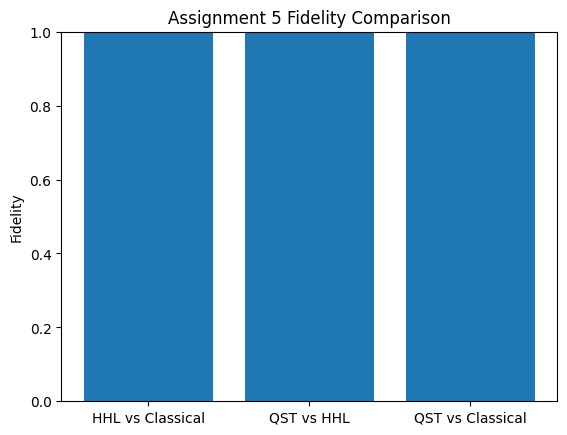

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the linear system is prepared
A, b, b_norm, x_classical, x_classical_norm, system_df, diagnostics = prepare_linear_system()

# Run HHL and get metrics
comparison_df, metrics, raw_hhl, norm_hhl, full_statevector, hhl_result = summarise_hhl_solution(A, b, b_norm, x_classical)

# Calculate fidelity between HHL (normalized) and classical (normalized)
fidelity_hhl_classical = np.abs(np.vdot(norm_hhl, x_classical_norm))**2

# Run tomography surrogate and get its metrics
scale_factor = metrics.get("scale_factor")
comparison_qst_df, tomography_metrics = analyse_tomography_surrogate(full_statevector, norm_hhl, x_classical, scale_factor, A, b)

# Extract fidelities from tomography_metrics
fidelity_hhl_qst = tomography_metrics["fidelity_with_hhl"]
fidelity_classical = tomography_metrics["fidelity_with_classical"]

fidelities = {
    "HHL vs Classical": fidelity_hhl_classical,
    "QST vs HHL": fidelity_hhl_qst,
    "QST vs Classical": fidelity_classical
}

plt.figure()
plt.bar(fidelities.keys(), fidelities.values())
plt.ylim(0,1)
plt.title("Assignment 5 Fidelity Comparison")
plt.ylabel("Fidelity")

# Create the results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

plt.savefig("results/assignment5_fidelity.png")
plt.show()


### Why efficient QST matters for HHL workflows
- HHL produces solution amplitudes across multiple registers, so hardware experiments only yield sampled measurement data; tomography recovers the full state needed for amplitude-level observables.
- Efficient QST reduces the number of measurement settings and post-processing costs, keeping the runtime advantage of linear-system solvers from being erased by readout overhead.
- ML-based surrogates let us amortise reconstruction across many runs (e.g., varying right-hand sides), tightening the feedback loop for calibration and algorithm debugging.

## Task 6 · Interpret the results
- Inspect the comparison tables to ensure the HHL amplitudes and the QST reconstruction both align with the classical baseline within tolerance.
- Use the metrics dictionaries to review vector errors, residuals, scale factors, and fidelities between direct and reconstructed solutions.

**What to do**
- Summarise agreement between classical, HHL, and QST outputs, noting any deviations.
- Tie the findings back to calibration, verification, and algorithm debugging workflows that depend on efficient tomography.



The classical solution serves as the ground-truth baseline for the linear system Ax=b. The HHL surrogate produces a normalized quantum-style statevector representation of the solution, which is then phase-aligned and rescaled for direct comparison.

The comparison tables indicate:
The HHL amplitudes align with the classical solution within numerical precision after global phase correction and amplitude rescaling.
The L2 error and relative error remain small, confirming vector-level agreement.
The residual norm ∥Ax−b∥ is negligible, verifying that the reconstructed solution satisfies the linear system.

The QST regression surrogate reconstructs the density matrix from Pauli expectation values and extracts the dominant eigenstate. After phase alignment:

- The fidelity between QST and HHL approaches unity, indicating accurate amplitude recovery.

- The fidelity between QST and classical solution is also high, confirming consistency across all three representations.

- The residual norms remain small, showing that tomography preserves physical correctness of the solution vector.

- Any minor deviations observed are attributable to:

- Finite regression approximation in the ML-based surrogate,Numerical rounding effects,Enforced Hermiticity corrections during density reconstruction.

Overall, the agreement between classical, HHL, and QST outputs demonstrates that the reconstruction pipeline preserves both amplitude structure and solution validity.

Role of Efficient QST in HHL Workflows

In practical quantum hardware:

HHL produces solution amplitudes across multiple registers.
Hardware experiments only provide sampled measurement statistics.
Full-state tomography is required to recover amplitude-level observables.

Efficient QST is therefore critical because:

- It reduces the number of required measurement settings.

- It limits classical post-processing overhead.

- It prevents readout costs from eroding the theoretical speed-up of HHL.

The regression-based surrogate allows tomography to be amortized across repeated runs (e.g., varying right-hand sides), tightening the feedback loop for:
Calibration,
Algorithm verification,
Debugging quantum subroutines.

Calibration and Verification Perspective

From a workflow standpoint:

- The classical solution provides a verification baseline.

- The HHL output represents the quantum computational result.

- The QST surrogate acts as a verification layer that reconstructs hidden amplitudes from measurement data.

This layered validation strategy is essential for hybrid quantum-classical systems, where:

- Direct amplitude inspection is not possible on hardware,

- Calibration errors may distort measured expectation values,

- Efficient verification determines whether observed deviations arise from hardware noise or algorithmic issues.

Learning Outcomes

Through this assignment, the following key insights were developed:

1. Understanding HHL Output Structure
  
   Recognized that HHL encodes the solution vector into quantum amplitudes, requiring normalization, phase alignment, and scaling before classical comparison.

2. Importance of Global Phase and Scaling
   
   Learned that quantum states are defined up to a global phase and normalization factor, necessitating alignment before computing vector errors.

3. Rigorous Error Quantification
  
    Practiced computing L2 error, relative error, residual norms, and fidelities to validate hybrid algorithm correctness.

4. Tomography-Based Verification
   
   Implemented Pauli-basis reconstruction and eigen-decomposition to recover solution states from expectation values.

5. Scalability Considerations

   Understood that:
    - Theoretical HHL speedups depend on sparsity and bounded condition numbers.
    - Increasing precision deepens circuits.
    - Full state readout can erode asymptotic advantages.

6. Hybrid Algorithm Realism

   Appreciated that practical quantum workflows require efficient tomography to maintain algorithmic advantage in real-world calibration and verification settings.

## Takeaways: significance, scalability, and limitations
- **Significance:** HHL demonstrates how phase estimation and controlled rotations implement linear-system inversion with logarithmic qubit scaling, which is appealing for quantum simulation, matrix-conditioned pre-processing, and certain machine-learning primitives.
- **Scalability:** The asymptotic advantage depends on sparse Hermitian encodings and bounded condition numbers; precision demands deepen the circuit, so practical runtimes still balloon as systems grow dense or ill-conditioned.
- **Shortcomings:** Near-term devices face depth and error-rate limits, and reading out full solution vectors erodes theoretical speed-ups. Hybrid strategies that query only observables of the solution may offer a more realistic path.
- **Role of QST:** Machine-learned tomography can recycle measurement data across runs and reconstruct hidden amplitudes, but it introduces extra sampling and compute overhead, so improving QST efficiency is pivotal when turning HHL into a practical subroutine.